Loading libraries

In [ ]:
#################################################################
#MultilayerPerceptron with keras
#Author: Edwyn Javier Aldana
################################################################
#Load libraries
#######################################################################################
#                           TensorFlow and tf.keras
#######################################################################################
import tensorflow as tf
from tensorflow import keras
#######################################################################################
#                              Other libraries
#######################################################################################
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score

Getting dataset, in this case, we use an standard dataset from NIST

In [ ]:
#Load dataset
#######################################################################################
#                                     Get data images
#######################################################################################
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[1].shape

(28, 28)

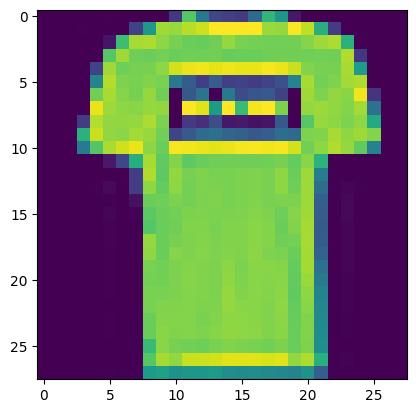

In [ ]:
plt.imshow(train_images[1])

In [ ]:
train_labels[1]
print(train_images[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

Exploring the dataset: We show a sample of training dataset and present some properties of traning and test dataset.

(60000, 28, 28)
(10000, 28, 28)


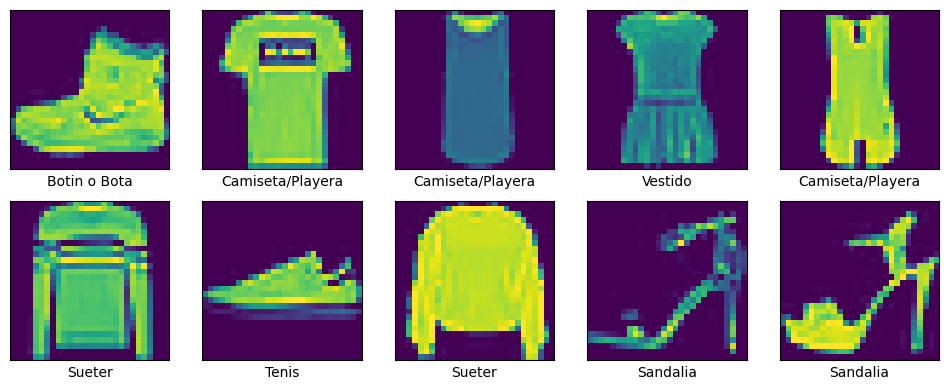

In [ ]:
#Explore data images
#Mapping the label number to the following text labels
class_names = ['Camiseta/Playera', 'Pantalon', 'Sueter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Tenis', 'Bolso/Bolsa', 'Botin o Bota']
plt.figure(figsize=(12,12))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
#Datasets cardinality
print(train_images.shape) #60000 images with size of 28x28 pixel
print(test_images.shape) #10000 images with size of 28x28 pixel


In [ ]:
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

Pre-processing dataset

In [ ]:
#Scaling  images between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

Building a neural network

In [ ]:
#Define the network architecture: 1) Input, Hidden and Output.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Input Layer
    keras.layers.Dense(128, activation=tf.nn.relu), #Hidden Layer
    keras.layers.Dense(64, activation=tf.nn.relu), #Hidden Layer
    keras.layers.Dense(10, activation=tf.nn.softmax) #Output Layer
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Training process

In [ ]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7848 - loss: 0.6171 - val_accuracy: 0.8538 - val_loss: 0.4027
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8643 - loss: 0.3746 - val_accuracy: 0.8618 - val_loss: 0.3925
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8774 - loss: 0.3363 - val_accuracy: 0.8603 - val_loss: 0.3860
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8867 - loss: 0.3057 - val_accuracy: 0.8611 - val_loss: 0.3807
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8921 - loss: 0.2897 - val_accuracy: 0.8719 - val_loss: 0.3583
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8976 - loss: 0.2746 - val_accuracy: 0.8776 - val_loss: 0.3473
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9013 - loss: 0.2618 - val_accuracy: 0.8749 - val_loss: 0.3503
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9063 - loss: 0.2507 - 

Testing process

In [ ]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Function to display predictions

In [ ]:
#Utilitary functions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)


def plot_value_array(i, labels, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks(labels)
    plt.xticks(np.arange(10), labels, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    plt.xlabel('class', fontsize=10)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

def plot_model_loss(history):
    plt.plot(history.history['loss'], label='Sparse Categorical Crossentropy (training data)')
    plt.plot(history.history['val_loss'], label='Sparse Categorical Crossentropy (validation data)')
    plt.title('Training History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch #')
    plt.legend(loc="upper left")
    plt.show()

def plot_model_accuracy(history):
    plt.plot(history.history['accuracy'], label='Accuracy (training data)')
    plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
    plt.title('Training History')
    plt.ylabel('Acc')
    plt.xlabel('Epoch #')
    plt.legend(loc="upper left")
    plt.show()

def display_statistics(predictions, y_test):
  if predictions.ndim == 2 and predictions.shape[1] > 1:
      y_pred = np.argmax(predictions, axis=1)
      y_true = np.argmax(y_test, axis=1) if (hasattr(y_test, "ndim") and y_test.ndim == 2 and y_test.shape[1] > 1) else y_test
      average = "weighted"
  else:
      y_pred = (predictions > 0.5).astype(int).ravel()
      if hasattr(y_test, "ndim") and y_test.ndim == 2 and y_test.shape[1] > 1:
          y_true = np.argmax(y_test, axis=1)
      else:
          y_true = np.ravel(y_test).astype(int)
      average = "binary"

  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average=average, zero_division=0)
  rec  = recall_score(y_true, y_pred, average=average, zero_division=0)
  # cm   = confusion_matrix(y_true, y_pred)

  print("Accuracy :", acc)
  print("Precision:", prec)
  print("Recall   :", rec)

  print("\nReporte de clasificación:\n", classification_report(y_true, y_pred, zero_division=0))



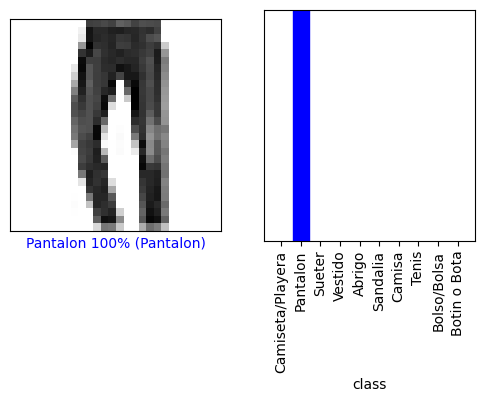

In [ ]:
id_image=5 #Change the number of image
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(id_image, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(id_image, class_names,predictions,  test_labels)



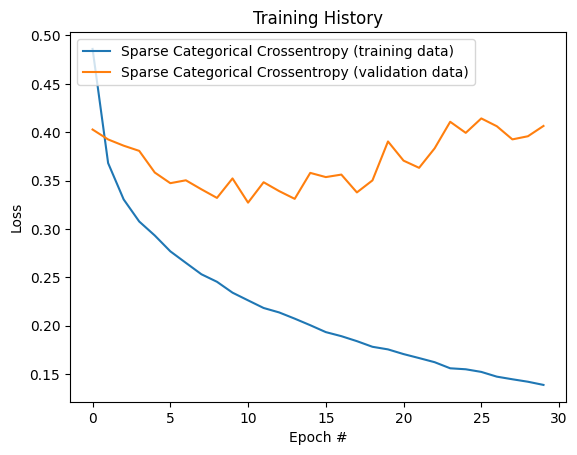

In [ ]:
plot_model_loss(history)

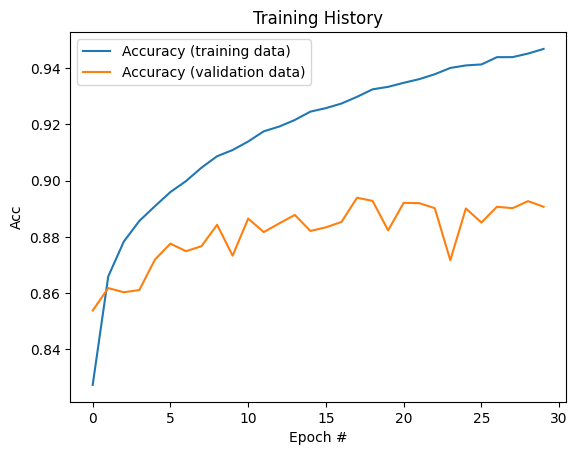

In [ ]:
plot_model_accuracy(history)

In [ ]:
display_statistics(predictions, test_labels)

Accuracy : 0.8907
Precision: 0.8927201815387885
Recall   : 0.8907

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.86      0.73      0.79      1000
           3       0.89      0.89      0.89      1000
           4       0.76      0.86      0.81      1000
           5       0.98      0.98      0.98      1000
           6       0.71      0.73      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

